### 3.8.6 梯度下降法求解线性回归问题：模拟数据

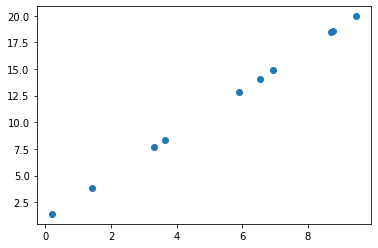

In [4]:
import random
import matplotlib.pyplot as plt
import time
%matplotlib inline

#m是样本格式，[0,x_range]是x坐标的范围
#对直线y = 2x+b进行随机噪声采样
# 返回所有样本的特征的向量x和对应目标值的向量y
def gen_data(k=2, b=1,m=10,x_range=10):
    x = []
    y_true = []
    y = []
    
    for i in range(m):
        xi = random.uniform(0, x_range)
        
        x.append([xi])
        yi = k * xi + b
        y_true.append(yi)        
        yi_noise = yi + (random.random()-0.5)*2
        y.append(yi_noise)
    return x, y_true

#辅助函数：用于得到矩阵的一列
def column(matrix, i):
    return [row[i] for row in matrix]

train_x, train_y = gen_data()
plt.scatter(column(train_x,0), train_y)  

在下面的线性回归的实现程序中，编写了如下的一些函数：
```
	plot_line()：绘制一个θ值对应的假设函数的直线图像。
	h_theta_x()：对一组样本特征x，计算它们的假设函数h_θ (x)的值。
	cost_function()：计算代价函数J(θ)及其梯度的值。
	gradient_descent()：梯度下降算法更新θ。
	linear_regression()：传入初始样本数据，调用 gradient_descent()求解θ。
```

99 40.73848057587037
199 18.20146669822213
299 8.14983418722456
399 3.6666692000749053
499 1.6670354998140908
599 0.7750547952901901
699 0.3770868255794779
799 0.19944868238353436
899 0.12007807593360684
999 0.08453535144282942
[0.3045644607648675, 2.0595236473252143]


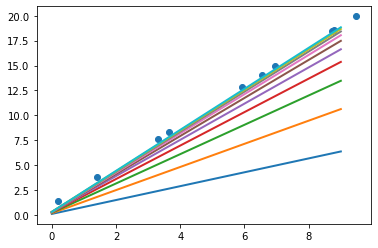

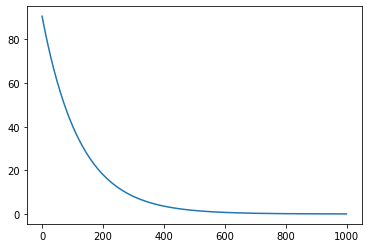

In [6]:
def plot_line(theta,x_range = 10):     
    X = []
    predictions = []
    for x in range(x_range):
        X.append(x)
        predictions.append(theta[0]+theta[1]*x)
    plt.plot(X[:], predictions, linewidth=2)  
   
def h_theta_x(X, theta):
    m = len(X)
   # n = len(theta)
    n = len(X[0])
    h = [0]*m   
    for i in range(m):        
        for j in range(n):           
            h[i] +=  X[i][j]*theta[j]
    return h

def cost_function(X, Y, theta):
    m = len(Y)
    n = len(theta)
    
    f = 0
    g = [0]*n
    h = h_theta_x(X,theta)
    h_y =   [x-y for x,y in zip (h,Y) ]    
    f = sum([ x*x for x in h_y])/(2*m)
    
    for j in range(n):
        for i in range(m):
            g[j] += h_y[i]*X[i][j]
        g[j] /= m
    
    return f,g


DEBUG_PLOT = True
DEBUG_PLOT_NUM  = 100 

def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for i in range(iterations):
        cost,gradient = cost_function(X, Y, theta)
        cost_history[i] = cost
        theta = [theta_-alpha*g for theta_,g in zip (theta,gradient) ]     #theta = theta - alpha * gradient     
        if i % DEBUG_PLOT_NUM == DEBUG_PLOT_NUM-1:
            print(i,cost)
            if DEBUG_PLOT:
                plot_line(theta)  
                time.sleep(1)
            
    return theta, cost_history

def linear_regression(X,Y,alpha = 0.0001, num_iter = 1000):
    n = len(X[0])  
    theta = [0]*n 
    theta_opt, cost_history = gradient_descent(X, Y, theta, alpha, num_iter) 
    return theta_opt,cost_history
   
if __name__ == '__main__':
    plt.scatter(column(train_x,0), train_y)   
    X = [ [1]+x for x in  train_x]
    theta,cost_history = linear_regression(X,train_y)
    print(theta)    
    plt.show()
    plt.plot(cost_history)


可以编写如下代码来检查分析梯度的计算是否正确。

In [7]:
import math
def J(X, Y,theta):
    m = len(X)
    h = h_theta_x(X,theta)
    h_y =   [x-y for x,y in zip (h,Y) ]    
    f = sum([ x*x for x in h_y])/(2*m)
    return f
    
def computeNumericalGradient(X,Y, theta, epsilon=1e-7):
    n = len(theta)
    grad_approx = [0]*n
    for j in range(n):
        thetaplus = theta[:]
        thetaplus[j] += epsilon                 # Step 1      
        thetaminus = theta[:]
        thetaminus[j] -= epsilon                 # Step 2
        J_plus = J(X, Y,thetaplus)                # Step 3
        J_minus = J(X, Y,thetaminus)              # Step 4
        grad_approx[j] = (J_plus - J_minus) / (2 * epsilon)           # Step 5
    f,grad = cost_function(X,Y,theta)
    
    print(grad)
    print(grad_approx)
    diff  =  [g-g_approx for g,g_approx in zip(grad,grad_approx) ]    
    difference = sum([ math.fabs(x) for x in diff ])/n
    if difference < 1e-7:
        print("The gradient is correct!",difference)
    else:
        print("The gradient is wrong!",difference)
#用下面的代码检查数值梯度计算是否准确
X = [ [1]+x for x in  train_x]
theta = [0.5,1.5]   # theta的值应接近真正的theta值
computeNumericalGradient(X,train_y,theta)


[-3.24822552262208, -22.509044649003044]
[-3.248225506347069, -22.509044663721056]
The gradient is correct! 1.5496511407420144e-08


### 3.8.7 批梯度下降法(batch gradient descent)

99 0.06568640594025733
199 0.05426749553718983
99 0.023880503008474257
199 0.021776432838217983
99 0.02612490474876934
199 0.023043854173099367
99 0.023004504508117165
199 0.019902830969637898
99 0.01170763268194742
199 0.01066159790495391
99 0.007516641423813317
199 0.007002578694199833
[0.6585168311571828, 2.0441066863128947]


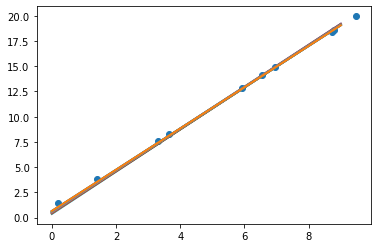

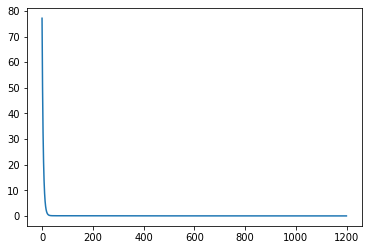

In [9]:
def batch_gradient_descent(X, Y, theta, alpha, iterations=300,m = 5,batch_iterations = 2):
    total_cost_history = []
    M = len(Y)
  
    for i in range(batch_iterations):   
        select = random.sample(range(M), m)      
        X_m = [X[i] for i in select]
        Y_m = [Y[i] for i in select]
        theta, cost_history = gradient_descent(X_m,Y_m,theta, alpha, iterations)
        total_cost_history +=  cost_history   
    return theta,total_cost_history
def linear_regression_batch(X,Y,alpha = 0.0001, iterations = 100,sample_m  =5,batch_iterations = 11):
    n = len(X[0])  
    theta = [0]*n 
    theta_opt, cost_history = batch_gradient_descent(X, train_y, theta, alpha, iterations,sample_m,batch_iterations)   
    return theta_opt,cost_history
   
if __name__ == '__main__':     
    plt.scatter(column(train_x,0), train_y)   
    X = [ [1]+x for x in  train_x]
    theta,cost_history = linear_regression_batch(X,train_y,0.003,200,7,6)
    print(theta)    
    plt.show()
    plt.plot(cost_history)    

### 3.8.8 房屋价格预测

下面使用的是Stanford的吴恩达的机器学习课程的房屋预测问题中的[数据](https://hwdong.net/2018/09/30/%E5%90%B4%E6%81%A9%E8%BE%BE%E7%9A%84%E6%88%BF%E5%B1%8B%E4%BB%B7%E6%A0%BC%E9%A2%84%E6%B5%8B%E6%95%B0%E6%8D%AE/)，这个数据中有47个样本，每个样本包含（面积、房间数、价格），即样本的特征是(面积、房间数)，而目标是价格。数据通常存储在文件中，因为未介绍文件读写，这里直接将数据放在一个list变量中：


In [11]:
house_data = [
2104,3,399900,
1600,3,329900,
2400,3,369000,
1416,2,232000,
3000,4,539900,
1985,4,299900,
1534,3,314900,
1427,3,198999,
1380,3,212000,
1494,3,242500,
1940,4,239999,
2000,3,347000,
1890,3,329999,
4478,5,699900,
1268,3,259900,
2300,4,449900,
1320,2,299900,
1236,3,199900,
2609,4,499998,
3031,4,599000,
1767,3,252900,
1888,2,255000,
1604,3,242900,
1962,4,259900,
3890,3,573900,
1100,3,249900,
1458,3,464500,
2526,3,469000,
2200,3,475000,
2637,3,299900,
1839,2,349900,
1000,1,169900,
2040,4,314900,
3137,3,579900,
1811,4,285900,
1437,3,249900,
1239,3,229900,
2132,4,345000,
4215,4,549000,
2162,4,287000,
1664,2,368500,
2238,3,329900,
2567,4,314000,
1200,3,299000,
852,2,179900,
1852,4,299900,
1203,3,239500]

为使用前面的线性回归代码，将这个数据分成特征和目标2个list：

In [12]:
train_x = []
train_y = []
for i in range(47):
    j = 3*i
    train_x.append([house_data[j],house_data[j+1]])
    train_y.append(house_data[j+2])
#测试一下是否正确
for i in range(5):
    print(train_x[i],train_y[i])


[2104, 3] 399900
[1600, 3] 329900
[2400, 3] 369000
[1416, 2] 232000
[3000, 4] 539900


In [ ]:
下面是3个辅助函数，用于对样本的某个特征(某一列)进行规范化：

In [17]:
import math 

def mean(X, column):   
    n = len(X)
    return sum(x[column] for x in X)/n  

def standard_deviation(X, column):
    n = len(X) 
    mean_ = mean(X, column)     
    return math.sqrt(sum((x[column]-mean_)**2 for x in X)/n )

def Normalization(X, column):
    mean_ = mean(X,column)
    deviation = standard_deviation(X,column)
    for x in X:
        x[column]  = (x[column]-mean_)/deviation
    return mean_,deviation


现在，对X的两个特征用上述的函数进行规范化：

In [18]:
# 显示几个样本数据，看看规范化是否正确
for i in range(5):
    print(train_x[i])
mean_1,deviation_1 = Normalization(train_x,0)
mean_2,deviation_2 =Normalization(train_x,1)
for i in range(5):
    print(train_x[i])


[0.13141542202104753, -0.22609336757768828]
[-0.5096406975906851, -0.22609336757768828]
[0.5079086986184144, -0.22609336757768828]
[-0.743677058718778, -1.5543919020966084]
[1.2710707457752388, 1.1022051669412318]
[0.13141542202104756, -0.22609336757768864]
[-0.5096406975906852, -0.22609336757768864]
[0.5079086986184145, -0.22609336757768864]
[-0.7436770587187781, -1.5543919020966093]
[1.271070745775239, 1.102205166941232]


现在，可以用前面的线性回归代码对房屋特征及其价格数据进行线性回归，得到一个最佳的假设线性函数：

99 10765697673.47193
199 3368381003.7895107
299 2291774852.991374
399 2106213044.7604928
[334302.06399327697, 99411.4494735893, 3267.012854065675]


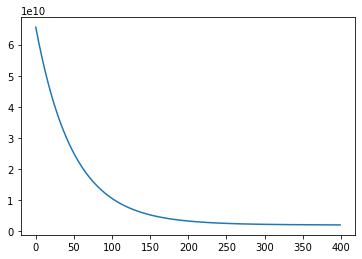

In [19]:
#theta, alpha, iterations=500,m = 5,batch_iterations = 10
DEBUG_PLOT = False

theta = [0]*3
alpha = 0.01   # learning rate
iterations = 400
sample_m = 12
batch_iterations = 5

X = [ [1]+x for x in  train_x]

#theta_opt, cost_history = batch_gradient_descent(X, train_y, theta, alpha, iterations,sample_m,batch_iterations)
theta_opt, cost_history = gradient_descent(X, train_y, theta, alpha, iterations)
print(theta_opt)
plt.plot(cost_history)

得到了房屋特征值和价格的预测模型，就可以用这个模型去预测一个新的房屋的价格，下面代码预测一个新房屋的价格：

In [20]:
theta = theta_opt
# 面积和房间数
area = 1650
bed_rooms = 3
# 预测价格(y 值)
x = (1,(area-mean_1)/deviation_1,(bed_rooms-mean_2)/deviation_2)  #规范化
predictedSellingPrice = x[0]*theta[0]+ x[1]*theta[1]+ x[2]*theta[2]   #根据假设函数计算预测价格
print('${:,.2f}'.format(predictedSellingPrice))    #打印预测的价格

$164,372,994.73
